In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('data/stud.csv')

In [20]:
X = df.drop(columns=['math_score'],axis= 0)

In [21]:
y = df['math_score']

In [22]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder"  , oh_transformer , cat_features) ,
    ("StandardSclaer" , numeric_transformer , num_features)
])

In [23]:
X = preprocessor.fit_transform(X)

In [24]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Create an Evaluate Function to give all metrics after model Training

In [29]:
def evaluate_model(true , predicted) :
    mae = mean_absolute_error(true , predicted)
    mse = mean_squared_error(true , predicted)
    rmse = np.sqrt(mean_squared_error(true , predicted))
    r2_square = r2_score(true , predicted)
    return mae , rmse , r2_square

In [34]:
models = {
    'Linear Regression' : LinearRegression() ,
    'Lasso' : Lasso() , 
    'Ridge' : Ridge() ,
    'K-Neighbors Regressor' : KNeighborsRegressor() ,
    'Decision Tree' : DecisionTreeRegressor() ,
    'Random Forest Regressor' : RandomForestRegressor() ,
    'XGBRegressor' : XGBRegressor() ,
    'CatBoosting Regressor' : CatBoostRegressor(verbose = False) ,
    'AdaBoost Regressor' : AdaBoostRegressor()
}

model_list = []
r2_list = []

for name , model in models.items() :
    
    model.fit(x_train , y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train_pred , y_train)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test_pred , y_test)

    print(f'The Model Is: {name}')
    model_list.append(name)

    print("Model Performance for Training set")
    print(f"- Root Mean Squared Error :{model_train_rmse:.4f}")
    print(f"- Mean Absolute Error :{model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print("-" * 10)

    print("Model Performance for Test set")
    print(f"- Root Mean Squared Error :{model_test_rmse:.4f}")
    print(f"- Mean Absolute Error :{model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")

    r2_list.append(model_test_r2)

    print("=" * 35)
    print("\n")


The Model Is: Linear Regression
Model Performance for Training set
- Root Mean Squared Error :5.3231
- Mean Absolute Error :4.2667
- R2 Score: 0.8563
----------
Model Performance for Test set
- Root Mean Squared Error :5.3940
- Mean Absolute Error :4.2148
- R2 Score: 0.8670


The Model Is: Lasso
Model Performance for Training set
- Root Mean Squared Error :6.5938
- Mean Absolute Error :5.2063
- R2 Score: 0.6904
----------
Model Performance for Test set
- Root Mean Squared Error :6.5197
- Mean Absolute Error :5.1579
- R2 Score: 0.7275


The Model Is: Ridge
Model Performance for Training set
- Root Mean Squared Error :5.3233
- Mean Absolute Error :4.2650
- R2 Score: 0.8558
----------
Model Performance for Test set
- Root Mean Squared Error :5.3904
- Mean Absolute Error :4.2111
- R2 Score: 0.8668


The Model Is: K-Neighbors Regressor
Model Performance for Training set
- Root Mean Squared Error :5.7088
- Mean Absolute Error :4.5177
- R2 Score: 0.7983
----------
Model Performance for Test s

In [36]:
r2_list

[0.8670435914705477,
 0.7275365655025169,
 0.8667954531044717,
 0.645765629104175,
 0.7162764900594565,
 0.8221582556347325,
 0.7932567221484703,
 0.8113832919701112,
 0.8105977104471886]

# Results

In [37]:
pd.DataFrame(list(zip(model_list , r2_list)) , columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.867044
2,Ridge,0.866795
5,Random Forest Regressor,0.822158
7,CatBoosting Regressor,0.811383
8,AdaBoost Regressor,0.810598
6,XGBRegressor,0.793257
1,Lasso,0.727537
4,Decision Tree,0.716276
3,K-Neighbors Regressor,0.645766


# Linear Regression

In [39]:
lin_model = LinearRegression()
lin_model = lin_model.fit(x_train , y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test , y_pred)
print(f'Accuracy of the model is {score:.2f}')

Accuracy of the model is 0.88


# Plot y_pred and y_test

C:\Users\s.moghadari\AppData\Local\Temp\ipykernel_9712\79194497.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test , y_pred , marker = '*' , cmap = 'red')


Text(0, 0.5, 'Predicted')

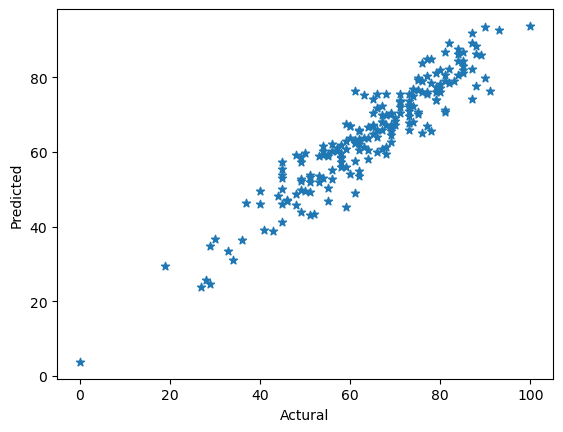

In [43]:
plt.scatter(y_test , y_pred , marker = '*' )
plt.xlabel('Actural')
plt.ylabel('Predicted')

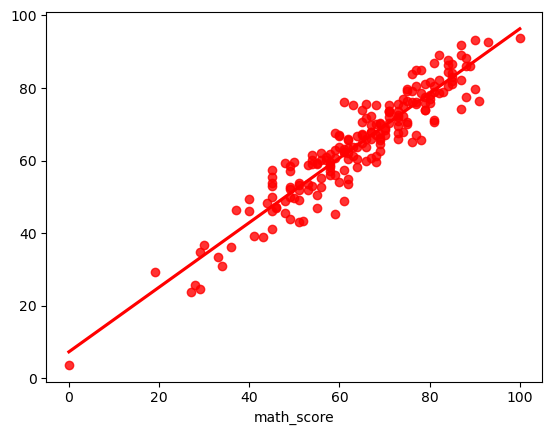

In [45]:
sns.regplot(x = y_test,y = y_pred,ci=None,color ='red');

In [46]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
